# Red Wine Quality Analysis
This code has been picked up from Kaggle containing data on Red wine, its ingredients and its quality. The quality attribute has 6 levels. We'll be analyzing the dataset on the first step i.e Data Cleaning - dealing with missing values if any, using MICE technique to deal with outliers in the data

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from imblearn.combine import SMOTETomek

In [148]:
path="C:/Users/lenovo/Downloads/winequality-red.csv"
df=pd.read_csv(path,sep=';')

In [136]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All the attributes are of type float, so our data contains no categorical variable except the target variable.

In [138]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [139]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [149]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:>

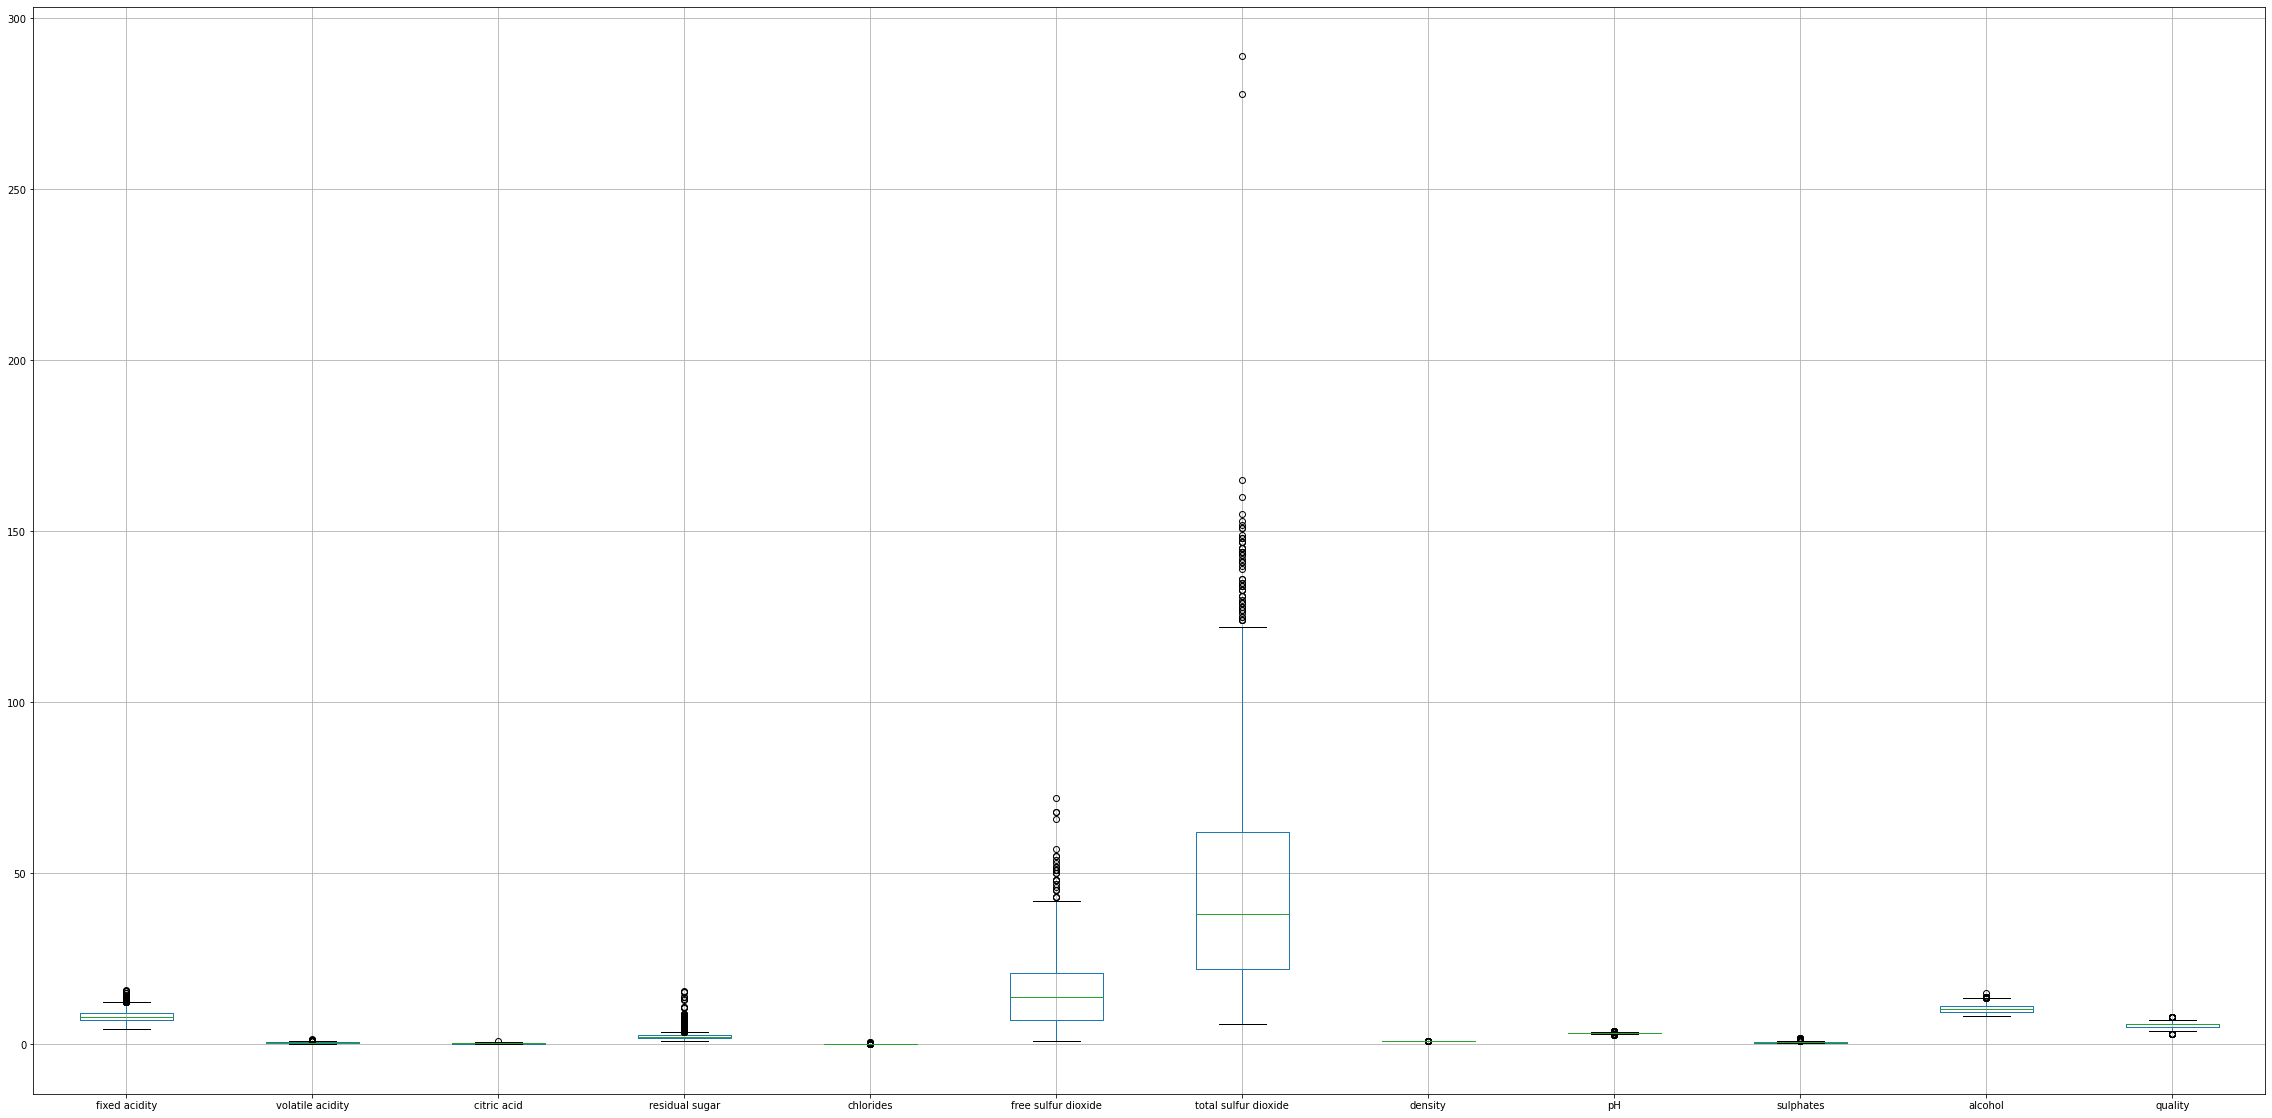

In [140]:
df.boxplot(figsize=(40,20))

# Boxplot
There are a lot of outliers, also the data needs to be rescaled before modelling .


In [141]:
X = df.iloc[:,0:11]
y = df['quality']

In [144]:
#Using Winsorizing technique to deal with outliers because I don't want to delete the rows.
# we' use 90% winsorizing - bottom 5 % and upper 5%
for i in df.columns:
    ll=df[i].quantile(0.02)
    ul=df[i].quantile(0.98)
    for j in range(1599):
        if df.loc[j].at[i] < ll:
            df.loc[j].at[i] = ll
        elif df.loc[j].at[i] > ul:
            df.loc[j].at[i] = ul
            

In [145]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [147]:
df['quality'].value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

In [146]:
#dealing with outliers
from scipy import stats
z = np.abs(stats.zscore(df._get_numeric_data()))
print(z)
df= df[(z < 3).all(axis=1)]
print(df.shape)

[[0.52835961 0.96187667 1.39147228 ... 0.57920652 0.96024611 0.78782264]
 [0.29854743 1.96744245 1.39147228 ... 0.1289504  0.58477711 0.78782264]
 [0.29854743 1.29706527 1.18607043 ... 0.04808883 0.58477711 0.78782264]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.54204194 0.54162988 0.45084835]
 [1.39015528 0.65462046 0.77526673 ... 0.30598963 0.20930812 0.78782264]
 [1.33270223 1.21684919 1.02199944 ... 0.01092425 0.54162988 0.45084835]]
(1451, 12)


In [74]:
df['quality'].value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

While using Z score to deal with outliers, and removing the rows , we see that all the values of one entire category of 'quality' variable gets removed. So clearly, there is a loss of data and we don't use this method
Update : Same problem with winsorizing


# Converting Regression problem to Categorical problem
1 indicating Good quality of wine
; 0 indicating Bad quality of wine

In [64]:
df['target']=['1' if x>=7 else '0' for x in df['quality']]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [65]:
df['target'].value_counts()

0    1382
1     217
Name: target, dtype: int64

The data is imbalanced, so after EDA we'll use the SMOTE technique to deal with imbalanced dataset - it is basically a technique of oversampling to balance the categorical target variable and hence for a better analysis of Supervised learning  model.

# EDA

In [19]:
x = df.iloc[:,0:11]
y = df['quality']
print(Counter(y))

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})


In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=\
train_test_split(x,y,test_size=0.3,random_state=10)

In [92]:
#Balancing imbalanced dataset
os=SMOTE()
X_train_smote,y_train_smote=os.fit_resample(X_train.astype('float'),y_train)

import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

In [93]:
print("Before SMOTE : ", Counter(y_train))
print("After SMOTE : ", Counter(y_train_smote))

Before SMOTE :  Counter({5: 471, 6: 455, 7: 141, 4: 37, 3: 8, 8: 7})
After SMOTE :  Counter({6: 471, 5: 471, 4: 471, 7: 471, 8: 471, 3: 471})


In [94]:
X_train_smote

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,10.300000,0.530000,0.480000,2.500000,0.063000,6.000000,25.000000,0.999800,3.120000,0.590000,9.300000
1,12.200000,0.450000,0.490000,1.400000,0.075000,3.000000,6.000000,0.996900,3.130000,0.630000,10.400000
2,8.700000,0.290000,0.520000,1.600000,0.113000,12.000000,37.000000,0.996900,3.250000,0.580000,9.500000
3,10.800000,0.450000,0.330000,2.500000,0.099000,20.000000,38.000000,0.998180,3.240000,0.710000,10.800000
4,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
...,...,...,...,...,...,...,...,...,...,...,...
2821,8.896689,0.426140,0.473860,1.776764,0.069490,7.290444,20.182396,0.994491,3.230331,0.697552,12.523236
2822,5.530778,0.600800,0.036156,1.676889,0.044308,23.075545,87.307778,0.991292,3.518467,0.820000,13.661444
2823,8.803688,0.339164,0.421639,2.112377,0.065124,3.916393,14.374590,0.996550,3.193344,0.893812,10.458197
2824,5.906216,0.819979,0.078820,1.472051,0.046501,11.579704,83.676951,0.992688,3.535383,0.809793,12.785920


In [95]:
y_train_smote.value_counts()

4    471
6    471
8    471
3    471
5    471
7    471
Name: quality, dtype: int64

In [96]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.51875


col_0,3,4,5,6,7
quality,,,,,
3,0,0,1,1,0
4,0,0,12,4,0
5,0,1,137,69,3
6,1,0,76,93,13
7,0,2,15,22,19
8,0,0,2,7,2


In [97]:
model.fit(X_train_smote,y_train_smote)
y_predict=model.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.36666666666666664


col_0,3,4,5,6,7,8
quality,,,,,,
3,1,1,0,0,0,0
4,3,5,5,2,0,1
5,23,30,91,46,13,7
6,12,36,40,52,33,10
7,1,11,1,11,27,7
8,0,1,1,4,5,0


In [98]:
smk=SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(x,y)

In [99]:
X_res.shape,y_res.shape

((3914, 11), (3914,))

In [100]:
print(Counter(y_res))

Counter({3: 678, 8: 673, 7: 668, 4: 667, 5: 619, 6: 609})


In [101]:
model.fit(X_res,y_res)
y_predict=model.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.6229166666666667


col_0,3,4,5,6,7,8
quality,,,,,,
3,2,0,0,0,0,0
4,0,15,1,0,0,0
5,11,18,135,33,5,8
6,10,22,33,85,22,11
7,0,0,3,2,51,2
8,0,0,0,0,0,11


In [102]:
X_res

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...
3909,7.460685,0.358786,0.319419,2.018466,0.074485,16.757260,25.577810,0.994567,3.253351,0.719419,11.569918
3910,8.293899,0.365820,0.393055,2.040515,0.059241,13.176834,29.000000,0.995526,3.159099,0.772154,10.996139
3911,7.729226,0.478521,0.326338,2.260916,0.075317,11.073933,19.390837,0.992978,3.213662,0.713169,12.519368
3912,8.128720,0.523680,0.157238,2.240233,0.067690,35.195346,49.333130,0.994221,3.388279,0.723564,12.565524


In [103]:
dd = pd.DataFrame(X_res)

In [104]:
dd.insert(0,'quality',y_res)

In [105]:
dd

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,5,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,5,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,6,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,5,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...,...
3909,8,7.460685,0.358786,0.319419,2.018466,0.074485,16.757260,25.577810,0.994567,3.253351,0.719419,11.569918
3910,8,8.293899,0.365820,0.393055,2.040515,0.059241,13.176834,29.000000,0.995526,3.159099,0.772154,10.996139
3911,8,7.729226,0.478521,0.326338,2.260916,0.075317,11.073933,19.390837,0.992978,3.213662,0.713169,12.519368
3912,8,8.128720,0.523680,0.157238,2.240233,0.067690,35.195346,49.333130,0.994221,3.388279,0.723564,12.565524


In [106]:
from scipy import stats
z = np.abs(stats.zscore(dd._get_numeric_data()))
print(z)
dd= dd[(z < 3).all(axis=1)]
print(dd.shape)

[[0.28616351 0.60025842 0.43905471 ... 1.21314402 0.6053774  1.14524152]
 [0.28616351 0.35496932 1.14980406 ... 0.82575818 0.15260106 0.80235566]
 [0.28616351 0.35496932 0.67597116 ... 0.43113195 0.03689356 0.80235566]
 ...
 [1.44497092 0.3983696  0.43547762 ... 0.73590227 0.36211285 1.52872655]
 [1.44497092 0.15339063 0.25716243 ... 0.41257387 0.42777244 1.56829167]
 [1.44497092 0.48895476 0.86959747 ... 0.29173037 1.25603936 1.90579714]]
(3580, 12)


In [107]:
dd

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,5,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,5,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,6,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,5,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...,...
3909,8,7.460685,0.358786,0.319419,2.018466,0.074485,16.757260,25.577810,0.994567,3.253351,0.719419,11.569918
3910,8,8.293899,0.365820,0.393055,2.040515,0.059241,13.176834,29.000000,0.995526,3.159099,0.772154,10.996139
3911,8,7.729226,0.478521,0.326338,2.260916,0.075317,11.073933,19.390837,0.992978,3.213662,0.713169,12.519368
3912,8,8.128720,0.523680,0.157238,2.240233,0.067690,35.195346,49.333130,0.994221,3.388279,0.723564,12.565524
